# Assess sparsity models

Assess sparsity models as TV, SPADE and BM3D (SPADE not implemented in python yet). 

## Mount google drive and paths

Start by mounting your google drive:   

In [ ]:
# Mount google drive to access files via colab
from google.colab import drive
drive.mount("/content/gdrive")

Define the path of the current notebook, something like /content/gdrive/MyDrive/Colab_Notebooks/3D_denosing/

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# path_main = os.getcwd()
path_notebook = "/content/gdrive/MyDrive/Colab_Notebooks/3D_denosing"
if os.path.exists(path_notebook) is False:
  os.mkdir(path_notebook)
os.chdir(path_notebook)

print('Current directory: ' + os.getcwd())

## Install codes

BM3D

In [ ]:
# Instal OpenBlas (linear algebra)
# !apt-cache search openblas
# !sudo apt-get install libopenblas-dev
!pip install bm3d

import bm3d

[link text](https://)Fetch code examples from https://pypi.org/project/bm3d/ (not needed). 

In [ ]:
if False:
  # Fetch BM3D code
  !wget -O BM3D.zip 'http://www.cs.tut.fi/~foi/GCF-BM3D/bm3d_py_demos.zip'

  # Unzip into a directory on the notebook directory
  !unzip BM3D.zip
  !rm BM3D.zip

  # Data path
  # path_data = os.path.join(path_notebook, '3D_denoising')
  # path_data = "/content/gdrive/MyDrive/Colab_Notebooks/Data/3D_denoising"

Total variation

In [ ]:
# TV
from skimage.restoration import denoise_tv_chambolle

### Load data set

Fetch the data running the following code, or download it from the link below and modify paths as needed. 

In [ ]:
# Fetch data and models
!wget -O data_models_denoising_comparison.zip 'https://www.dropbox.com/s/occmmmvpsttby26/data_models_denoising_comparison.zip?dl=0'

# Unzip into a directory on the notebook directory
!unzip data_models_denoising_comparison.zip
!rm data_models_denoising_comparison.zip

# Data path
path_data = os.path.join(path_notebook, '3D_denoising')
# path_data = "/content/gdrive/MyDrive/Colab_Notebooks/Data/3D_denoising"

# Models path
path_models = path_data

Load and display data:

In [ ]:
# Data path
path_data = os.path.join(path_notebook, '3D_denoising')
# path_data = "/content/gdrive/MyDrive/Colab_Notebooks/Data/3D_denoising"

# Name data set 
name_data_test = "kits19_3D_eval_data_4subj_10pcnoise_crop_rnd.npz"

# Load data
data = np.load(os.path.join(path_data, name_data_test))

data_test = data['data_test']
data_test_noisy = data['data_test_noisy']
print('Image size: ', data_test_noisy.shape)

Image size:  (4, 32, 256, 256, 1)


In [ ]:
# Display raw and noise images
def display_grid(plot_data, plot_titles, figsize=(6,6), nameSave = []):
# plot_data : list of images
# plot_titles: list of titles
    num_imgs = len(plot_data)
    num_cols = int(np.ceil(np.sqrt(num_imgs)))
    fig = plt.figure(figsize=figsize)
    for i in range(num_imgs):
        # Start next subplot.
        plt.subplot(num_cols, num_cols, i + 1, title=plot_titles[i])
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(plot_data[i], cmap='gray', vmin=0, vmax=1)
    if nameSave:
        fig.savefig(nameSave, dpi = 300, bbox_inches='tight') 
    return fig

### Apply denoising methods

BM3D denoising and image display

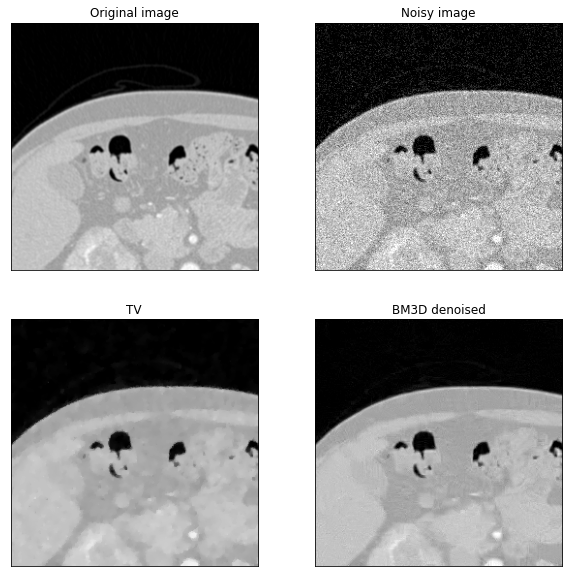

In [ ]:
# Select image slice
ind_batch, ind_z = 0, 0 
image = data_test[ind_batch,ind_z,:,:,0]
noisy_image = data_test_noisy[ind_batch,ind_z,:,:,0]

# TV
denoised_tv = denoise_tv_chambolle(noisy_image, weight=0.1)

# BM3D
sigma_psd = 20/255 #  30/255
denoised_bm3d = bm3d.bm3d(noisy_image, sigma_psd=sigma_psd, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

# Image display
fig = display_grid([image, noisy_image, denoised_tv, denoised_bm3d], 
                    ['Original image', 'Noisy image', 'TV', 'BM3D denoised'], figsize=(10,10))

Hyperparameters for TV and BM3D have not been optimized for these data; these should be optimized on training data. 

## References

[Dabov 2007] Kostadin Dabov, Alessandro Foi, Vladimir Katkovnik, Karen Egiazarian. Image denoising by sparse 3D transform-domain collaborative filtering", *IEEE Transactions on Image Processing* 16 (8): 2080–2095, 2007.

[Mäkinen 2020] Y. Mäkinen, L. Azzari, A. Foi. "Collaborative Filtering of Correlated Noise: Exact Transform-Domain Variance for Improved Shrinkage and Patch Matching", *IEEE Transactions on Image Processing*, vol. 29, pp. 8339-835, 2020.